In [14]:
from gene_viz.data_loader import load_data

from gene_viz.utils import get_data_path, load_mesh_geometry, get_michack_data_path
import os

import pandas as pd
import numpy as np
import nibabel as nb


In [15]:
# Initialise variables 

gene_name = 'PVALB'
cmap = 'jet'
slice = int(100)


In [16]:
# Load gene expression data 

coords, samples = load_data(gene_name)

In [17]:
# Plot and scatter data



In [18]:
# Load in meshes

cortical_mesh_file_path = os.path.join(get_data_path(),'fs_LR.32k.L.pial.surf.gii')
mesh = load_mesh_geometry(cortical_mesh_file_path)

In [19]:
# Interpolate gene data to meshes 

from gene_viz.interpolation.interpolation_core import interpolate
interpolated_values = interpolate(samples,coords, mesh['coords'])

print(interpolated_values)

[0.59637862 0.66663608 0.79458685 ... 0.55118007 0.62592726 0.5608639 ]


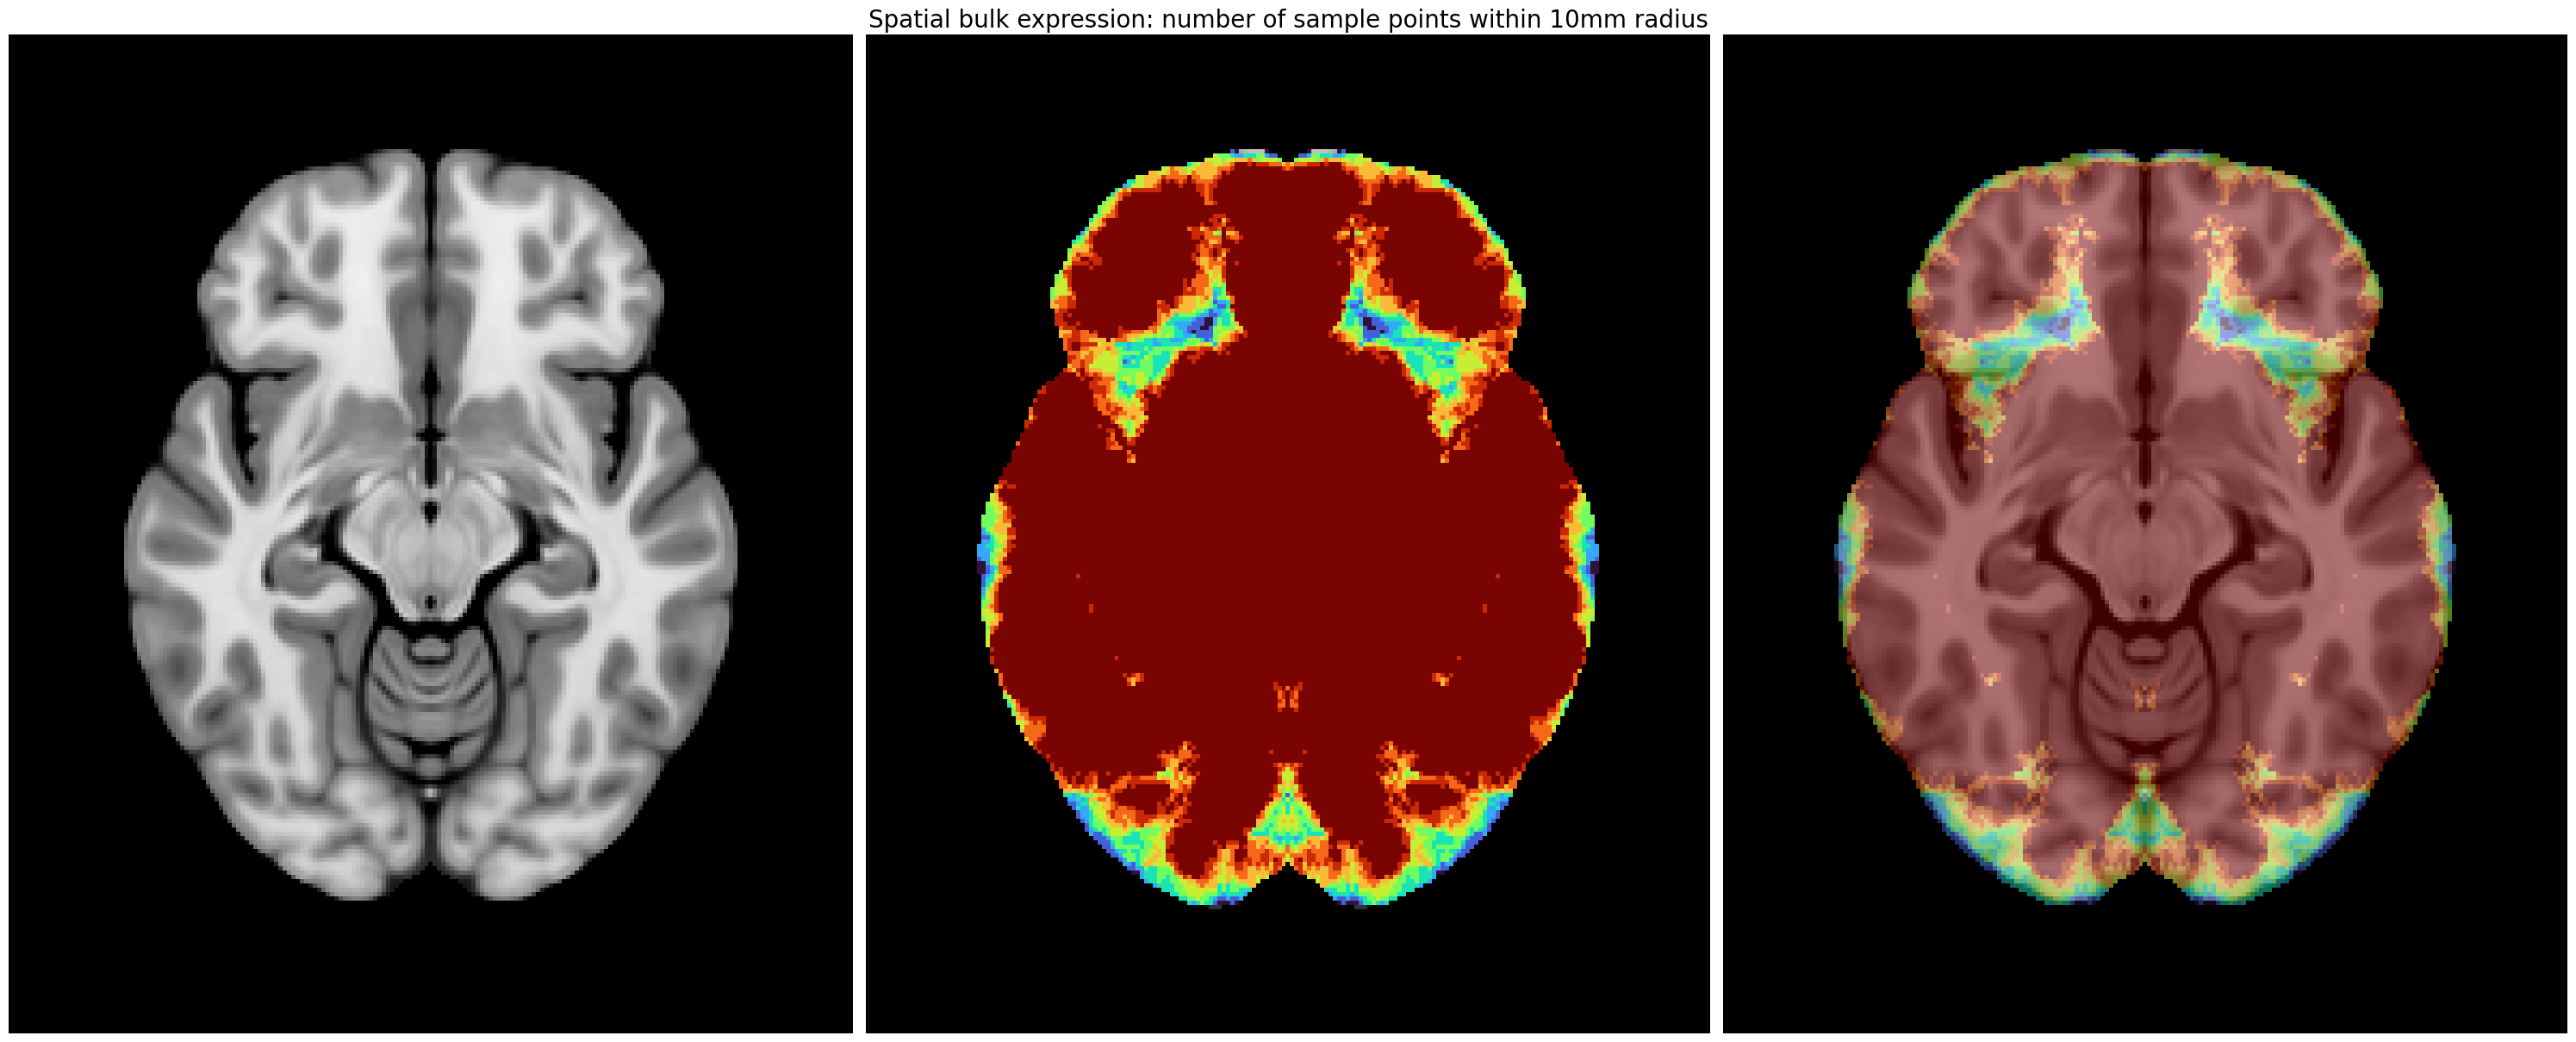

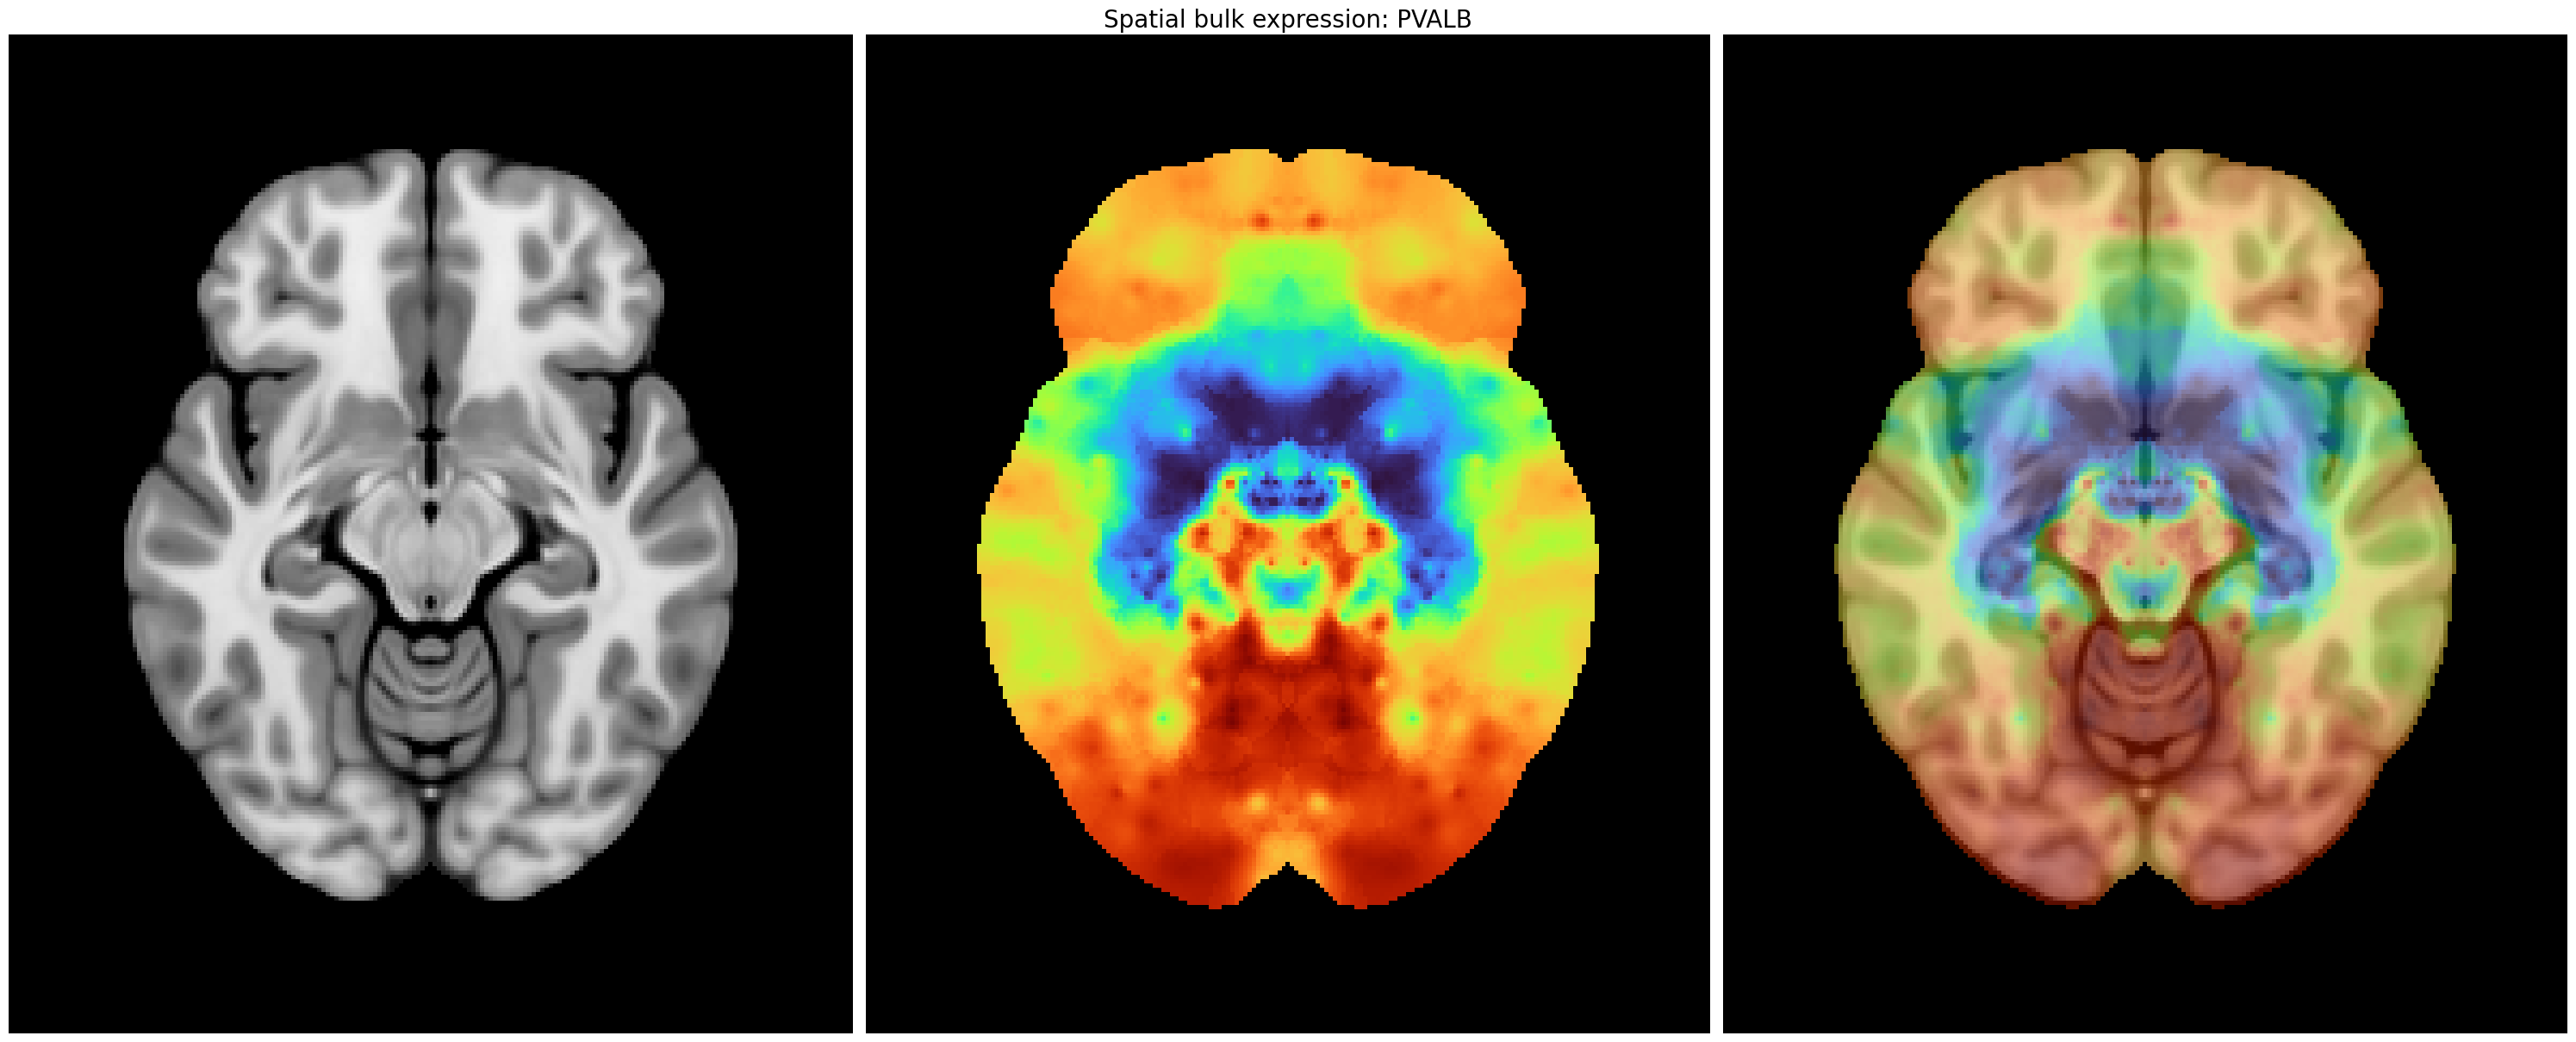

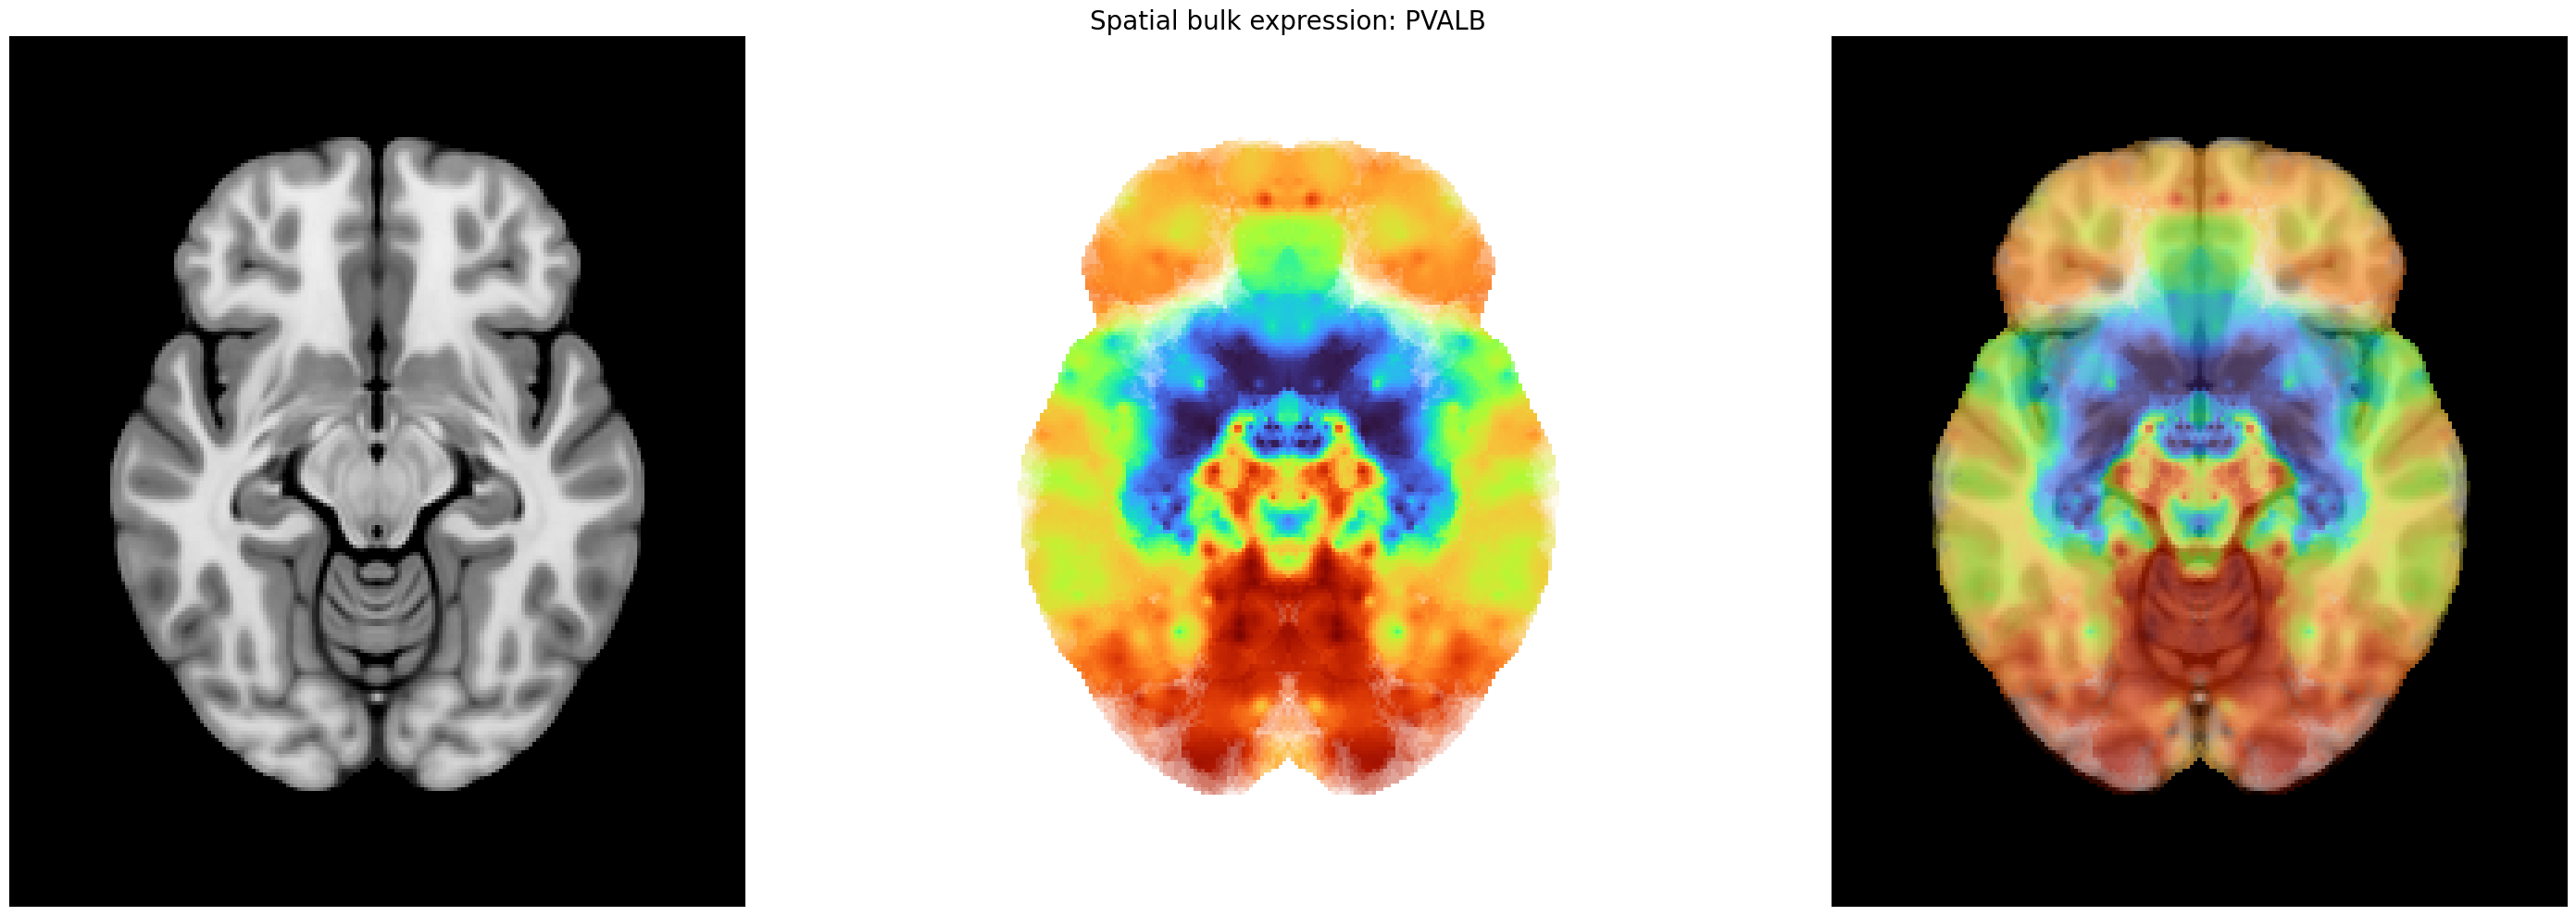

In [20]:

# Load in MRI - Jack
# Interpolate gene data to MRI slice - Jack
# Visualise data in meshes - Mathilde
# Visualise data in slice of MRI - Jack
# JACK HIGHTON, KING'S COLLEGE LONDON, 2025

from gene_viz.data_loader import load_data
from gene_viz.mni_atlas_loader import mni_atlas_loader
from gene_viz.interpolation.interpolation_core import interpolate
from gene_viz.interpolation_viz import make_3d_interpolated_grid_mni, plot_volumetrics_plane_alpha, get_point_density, show_figure

# choose gene
gene_name = 'PVALB'

# load expression point data 
coords, samples = load_data(gene_name)
# load mni nifty image
mni_img, mni_vol, affine = mni_atlas_loader()

# interpolate using default optimised model 
grid_values, X, Y, Z = make_3d_interpolated_grid_mni(
    samples=samples,
    sample_coords=coords,
    interp_func=interpolate,
    mni_img=mni_img,
    resolution=1  
)

# get number of expression sample points within "search_radius" mm of each point in space. 
# "search_k" is the maximum number of points searched for.
min_distance_vol, alpha_mask = get_point_density(coords=coords,search_radius=10,search_k=10,mni_img=mni_img,resolution=1)

# show number of local points overlaid on MRI. orientation: 1=coronal, 2=sagittal, 3=axial.
fig = plot_volumetrics_plane_alpha('number of sample points within 10mm radius', 
                                   mni_vol, min_distance_vol, section=60, orientation=2, alpha_mask=None)
show_figure(fig)

# show interpolated gene expression overlaid on MRI. orientation: 1=coronal, 2=sagittal, 3=axial.
fig = plot_volumetrics_plane_alpha(gene_name, mni_vol, grid_values, section=60, orientation=2, alpha_mask=None)
show_figure(fig)

# show interpolated gene expression overlaid on MRI, with alpha dependant on point density. orientation: 1=coronal, 2=sagittal, 3=axial.
fig = plot_volumetrics_plane_alpha(gene_name, mni_vol, grid_values, section=60, orientation=2, alpha_mask=alpha_mask)
show_figure(fig)

endchk=0


In [23]:
# Visualise data in slice

